# Project 1 <br>
Tazeem Khan <br>
Sudeeksha Agarwal <br>
Vamsi Krishna Pamidi 

In [ ]:
%pip install umap-learn

In [ ]:
!pip install datashader

In [ ]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import holoviews.operation.datashader as hd
from umap.umap_ import UMAP
import umap.plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc, roc_curve, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
#nltk.download('all')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import wordnet
import nltk
from sklearn.decomposition import TruncatedSVD
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder
import colorcet
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import numpy as np
from sklearn import svm
from scipy import spatial
from sklearn.model_selection import train_test_split
import string
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.manifold import TSNE

In [ ]:
data=pd.read_csv("/content/Project1-Classification.csv")

# **Getting Familiar with Dataset**

## Question 1:How many rows (samples) and columns (features) are present in the dataset?

In [ ]:
data

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports
...,...,...,...,...,...,...,...,...
3145,'By Rachel Premack of FreightWaves\n\nYou prob...,'Right now the barge industry — and all of us ...,"['coal', 'traffic', 'right', 'mississippi', 's...",NaN,['Tyler Durden'],https://www.zerohedge.com/markets/latest-suppl...,drought,climate
3146,'Manufacturing had a big summer. The CHIPS and...,'To address these issues and drive the transit...,"['manufacturing', 'system', 'future', 'technol...",NaN,['Mary Beth Gallagher'],https://news.mit.edu/2022/manufacturing-cleane...,drought,climate
3147,"'A golf cart on a path at Verrado, an 8,800-ac...",'Water flow has dropped precipitously in the C...,"['developers', 'live', 'state', 'development',...",NaN,['Keith Schneider'],https://news.yahoo.com/thousands-live-one-day-...,drought,climate
3148,"'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","['rohingyas', 'told', 'indonesia', 'refugees',...",NaN,['Online News Editor'],https://www.laprensalatina.com/dozens-of-rohin...,drought,climate


In [ ]:
print(data.shape)

(3150, 8)


**There are 3150 Rows (Samples) and 8 Columns (Features)**

## Histograms: Plot 3 histograms on

### The total number of alpha-numeric characters per data point (row) in the feature full text

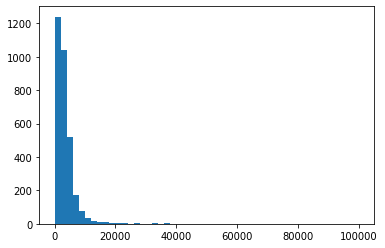

In [ ]:
char_len = list(map(len, data["full_text"]))

plt.hist(char_len,50)

plt.show()

###  The column leaf label – class on the x-axis;

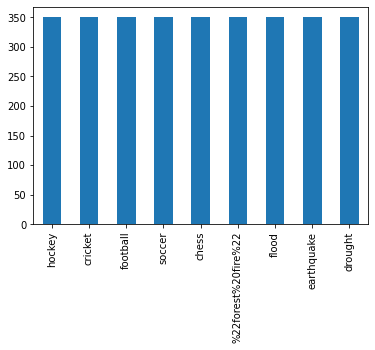

In [ ]:
data['leaf_label'].value_counts().plot(kind='bar')

In [ ]:
data['leaf_label'].value_counts()

hockey                 350
cricket                350
football               350
soccer                 350
chess                  350
%22forest%20fire%22    350
flood                  350
earthquake             350
drought                350
Name: leaf_label, dtype: int64

###  The column root label – class on the x-axis.

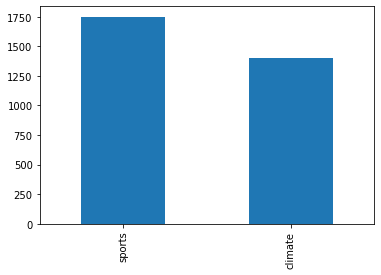

In [ ]:
data['root_label'].value_counts().plot(kind='bar')

In [ ]:
data['root_label'].value_counts()

sports     1750
climate    1400
Name: root_label, dtype: int64

# **Binary Classification**

In [ ]:
np.random.seed(42)
random.seed(42)

## Splitting the entire dataset into training and testing data

In [ ]:
train, test = train_test_split(data[["full_text","root_label"]], test_size=0.2)

## Question 2 : Report the number of training and testing samples.


In [ ]:
print("Number of samples in Training dataset:",train.shape[0])
print("Number of samples in Testing dataset:",test.shape[0])

Number of samples in Training dataset: 2520
Number of samples in Testing dataset: 630


## Cleaning the text

In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [ ]:
train= train.reset_index(drop=True)
test=  test.reset_index(drop=True)

In [ ]:
for i in range (0,len(train)):
  train['full_text'][i]=clean(train['full_text'][i])

for i in range (0,len(test)):
  test['full_text'][i]=clean(test['full_text'][i])

### Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)


In [ ]:
for i in range (0,len(train)):
  sent=[i for i in train['full_text'][i] if not i.isdigit()]
  sent = [i for i in train['full_text'][i] if i not in string.punctuation]
  train['full_text'][i]= "".join(sent)

for i in range (0,len(test)):
  sent=[i for i in test['full_text'][i] if not i.isdigit()]
  sent = [i for i in test['full_text'][i] if i not in string.punctuation]
  test['full_text'][i]= "".join(sent)

In [ ]:
train

,full_text,root_label
0,As of Sunday night a lopsided area of low pres...,climate
1,The UN childrens agency says some 2 million ch...,climate
2,Wicked winds and heavy rains battered the stat...,climate
3,I live in a community with a homeowners associ...,climate
4,The Special Olympics team took home the hard f...,sports
...,...,...
2515,Some Coachella Valley homeowners and communiti...,climate
2516,About Photo 4851709 Gerard Pique retired from ...,sports
2517,How much of your donated clothing finds a new ...,sports
2518,The Tennessee State football team fell out of ...,sports


### Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

In [ ]:
def lemmatize_sent(text):
    return [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(nltk.word_tokenize(text))]

In [ ]:
train['lemmatized_full_text']=''
test['lemmatized_full_text']=''

for i in range (0, len(train)):
  train['lemmatized_full_text'][i]=" ".join(lemmatize_sent(train['full_text'][i]))

for i in range (0, len(test)):
  test['lemmatized_full_text'][i]=" ".join(lemmatize_sent(test['full_text'][i]))

In [ ]:
train

,full_text,root_label,lemmatized_full_text
0,As of Sunday night a lopsided area of low pres...,climate,a of sunday night a lopsided area of low press...
1,The UN childrens agency says some 2 million ch...,climate,the un childrens agency say some 2 million chi...
2,Wicked winds and heavy rains battered the stat...,climate,wicked wind and heavy rain batter the state of...
3,I live in a community with a homeowners associ...,climate,i live in a community with a homeowner associa...
4,The Special Olympics team took home the hard f...,sports,the special olympics team take home the hard f...
...,...,...,...
2515,Some Coachella Valley homeowners and communiti...,climate,some coachella valley homeowner and community ...
2516,About Photo 4851709 Gerard Pique retired from ...,sports,about photo 4851709 gerard pique retire from s...
2517,How much of your donated clothing finds a new ...,sports,how much of your donate clothing find a new ho...
2518,The Tennessee State football team fell out of ...,sports,the tennessee state football team fell out of ...


### Use the “english” stopwords of the CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english',min_df=3)
result_count_vectorizer_train= cv.fit_transform(train['lemmatized_full_text'])
result_count_vectorizer_test = cv.transform(test['lemmatized_full_text'])

In [ ]:
result_count_vectorizer_train.shape

(2520, 15181)

In [ ]:
result_count_vectorizer_test.shape

(630, 15181)

## TF IDF with min_df=3

In [ ]:
tfidf_trans = TfidfTransformer(use_idf=True)

train_tfidf = tfidf_trans.fit_transform(result_count_vectorizer_train) # making the tfidf train matrix
print("Shape of TF-IDF train matrix: ", train_tfidf.shape)

test_tfidf = tfidf_trans.transform(result_count_vectorizer_test) # transforming the test data into the tfidf test matrix
print("Shape of TF-IDF test matrix: ", test_tfidf.shape)

Shape of TF-IDF train matrix:  (2520, 15181)
Shape of TF-IDF test matrix:  (630, 15181)


# Dimensionality Reduction

## Latent Semantic Indexing

In [ ]:
k=[1,10,100,200,500,1000,2000,50]

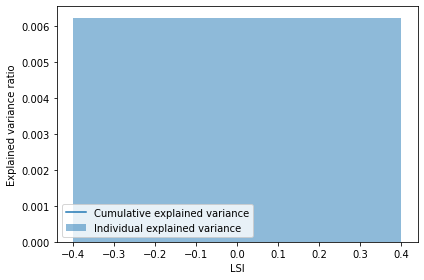

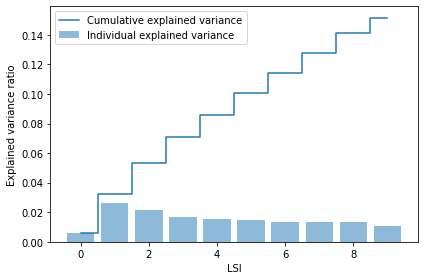

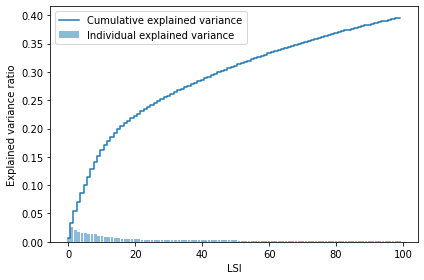

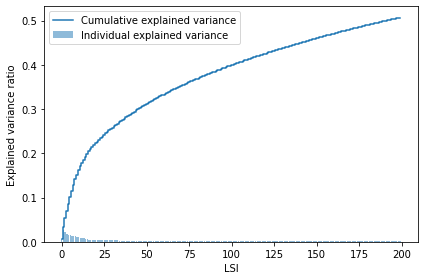

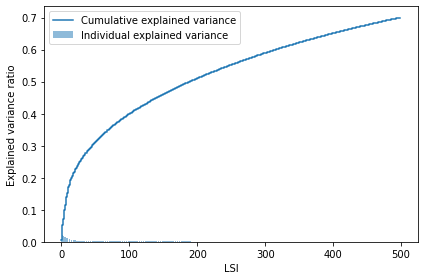

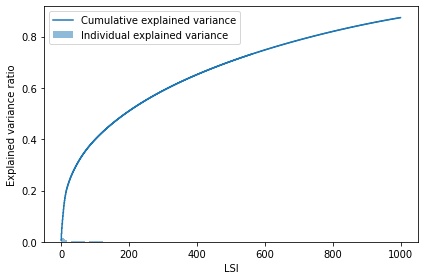

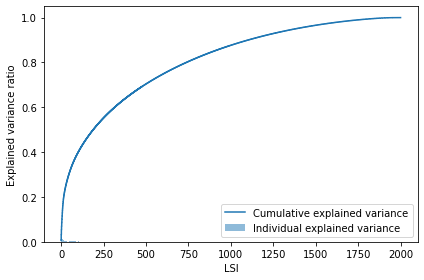

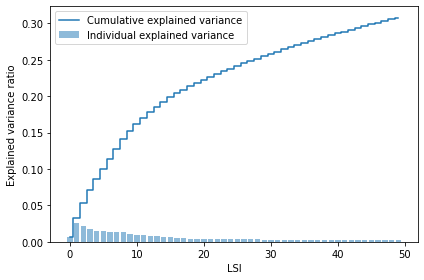

In [ ]:
for i in k:
  LSI = TruncatedSVD(n_components=i, random_state=42)

  train_LSI = LSI.fit_transform(train_tfidf) # performing LSI on the tfidf train matrix
  test_LSI = LSI.transform(test_tfidf)

  exp_var_LSI = LSI.explained_variance_ratio_

  cum_sum_eigenvalues = np.cumsum(exp_var_LSI)
  #
  # Create the visualization plot

  plt.bar(range(0,len(exp_var_LSI)), exp_var_LSI, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('LSI')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

In [ ]:
U_tr,S_tr,V_tr = randomized_svd(train_tfidf,n_components=50,random_state=42)
U_te,S_te,V_te = randomized_svd(test_tfidf,n_components=50,random_state=42)

## Non-Negative Matrix Factorization

In [ ]:
nmf = NMF(n_components=50,random_state=42)
train_NMF = nmf.fit_transform(train_tfidf)
test_NMF = nmf.transform(test_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [ ]:
print('LSI (train) error:',np.sum(np.array(train_tfidf - (U_tr.dot(np.diag(S_tr)).dot(V_tr)))**2))
print('NMF (train) error:',np.sum(np.array(train_tfidf - train_NMF.dot(nmf.components_))**2))

LSI (train) error: 1687.8485029615786
NMF (train) error: 1713.1452642145618


In [ ]:
print('LSI (test) error:',np.sum(np.array(test_tfidf - (U_te.dot(np.diag(S_te)).dot(V_te)))**2))
print('NMF (test) error:',np.sum(np.array(test_tfidf - test_NMF.dot(nmf.components_))**2))

LSI (test) error: 403.3002550440866
NMF (test) error: 454.7990271072376


# Classification Algorithms

## SVM with trade off parameter set to 1000 and 0.0001

In [ ]:
y_train=train['root_label']
y_test=test['root_label']

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
clf_hard = svm.SVC(kernel='linear',C=1000,random_state=42)
clf_soft = svm.SVC(kernel='linear',C=0.0001,random_state=42)
pred_hard = clf_hard.fit(train_LSI, y_train).predict(test_LSI)
pred_soft = clf_soft.fit(train_LSI, y_train).predict(test_LSI)

In [ ]:
train_LSI.shape

(2520, 50)

In [ ]:
test_LSI.shape

(630, 50)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


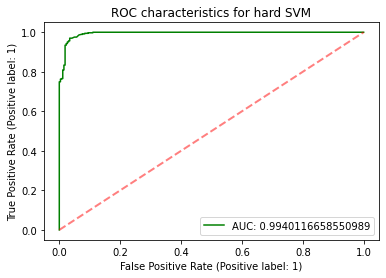

In [ ]:
fig, ax = plt.subplots()
fpr, tpr, _ = roc_curve(y_test, clf_hard.decision_function(test_LSI))
plot_roc_curve(clf_hard, test_LSI, y_test, ax=ax, color='g',label="AUC: "+str(auc(fpr,tpr))) 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.5)
plt.title('ROC characteristics for hard SVM')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


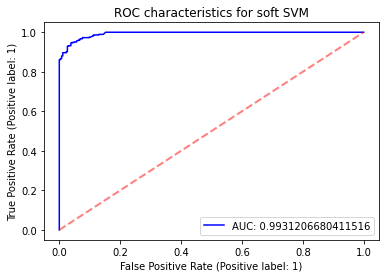

In [ ]:
fig, ax = plt.subplots()
fpr, tpr, _ = roc_curve(y_test, clf_soft.decision_function(test_LSI))
plot_roc_curve(clf_soft, test_LSI, y_test, ax=ax, color='b',label="AUC: "+str(auc(fpr,tpr))) 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.5)
plt.title('ROC characteristics for soft SVM')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


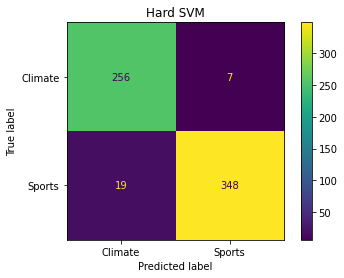

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


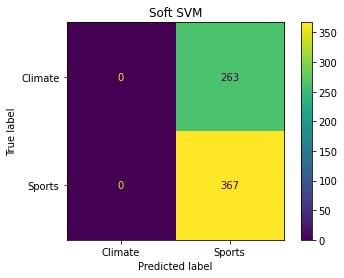

In [ ]:
plot_confusion_matrix(clf_hard, test_LSI, y_test,display_labels=['Climate','Sports'])
plt.title('Hard SVM')
plt.show()

plot_confusion_matrix(clf_soft, test_LSI, y_test,display_labels=['Climate','Sports']) 
plt.title('Soft SVM')
plt.show()

In [ ]:
print("Accuracy (hard SVM):", accuracy_score(y_test,pred_hard))
print("Recall (hard SVM):", recall_score(y_test,pred_hard))
print("Precision (hard SVM):", precision_score(y_test,pred_hard))
print("F1-Score (hard SVM):", f1_score(y_test,pred_hard))
print("Accuracy (soft SVM):", accuracy_score(y_test,pred_soft))
print("Recall (soft SVM):", recall_score(y_test,pred_soft))
print("Precision (soft SVM):", precision_score(y_test,pred_soft))
print("F1-Score (soft SVM):", f1_score(y_test,pred_soft))

Accuracy (hard SVM): 0.9587301587301588
Recall (hard SVM): 0.9482288828337875
Precision (hard SVM): 0.9802816901408451
F1-Score (hard SVM): 0.96398891966759
Accuracy (soft SVM): 0.5825396825396826
Recall (soft SVM): 1.0
Precision (soft SVM): 0.5825396825396826
F1-Score (soft SVM): 0.7362086258776329


## SVM with trade of parameter set to 100000

In [ ]:
clf_100000 = svm.SVC(kernel='linear',C=100000,random_state=42)
pred_100000 = clf_100000.fit(train_LSI, y_train).predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


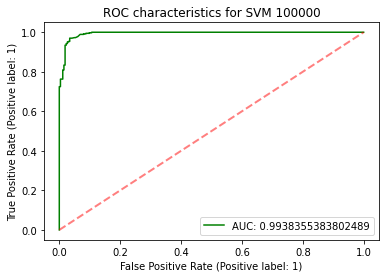

In [ ]:
fig, ax = plt.subplots()
fpr, tpr, _ = roc_curve(y_test, clf_100000.decision_function(test_LSI))
plot_roc_curve(clf_100000, test_LSI, y_test, ax=ax, color='g',label="AUC: "+str(auc(fpr,tpr))) 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.5)
plt.title('ROC characteristics for SVM 100000')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


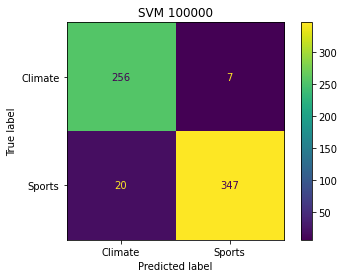

In [ ]:
plot_confusion_matrix(clf_100000, test_LSI, y_test,display_labels=['Climate','Sports'])
plt.title('SVM 100000')
plt.show()

In [ ]:
print("Accuracy (Trade of Paramaeter - 100000):", accuracy_score(y_test,pred_100000))
print("Recall (Trade of Paramaeter - 100000):", recall_score(y_test,pred_100000))
print("Precision (Trade of Paramaeter - 100000):", precision_score(y_test,pred_100000))
print("F1-Score (Trade of Paramaeter - 100000):", f1_score(y_test,pred_100000))

Accuracy (Trade of Paramaeter - 100000): 0.9571428571428572
Recall (Trade of Paramaeter - 100000): 0.9455040871934605
Precision (Trade of Paramaeter - 100000): 0.980225988700565
F1-Score (Trade of Paramaeter - 100000): 0.9625520110957004


## Use cross-validation to choose γ

In [ ]:
clf_cv = svm.SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,10,100,500,1000,5000,10000,50000,100000,500000,1000000],  
              'kernel': ['linear']}
grid = GridSearchCV(clf_cv,param_grid,cv=5,scoring='accuracy')
grid.fit(train_LSI,y_train)
pred_cv = grid.best_estimator_.predict(test_LSI)

In [ ]:
print('Best Value of gamma:',grid.best_params_['C']) 
for l, n in zip(param_grid['C'],grid.cv_results_['mean_test_score']):
    print(f'Gamma: {l}\t',f'Avg. Validation Accuracy: {n}')

Best Value of gamma: 500
Gamma: 0.001	 Avg. Validation Accuracy: 0.5488095238095239
Gamma: 0.01	 Avg. Validation Accuracy: 0.5492063492063493
Gamma: 0.1	 Avg. Validation Accuracy: 0.932936507936508
Gamma: 1	 Avg. Validation Accuracy: 0.9444444444444444
Gamma: 10	 Avg. Validation Accuracy: 0.9503968253968254
Gamma: 100	 Avg. Validation Accuracy: 0.9523809523809523
Gamma: 500	 Avg. Validation Accuracy: 0.9555555555555555
Gamma: 1000	 Avg. Validation Accuracy: 0.9547619047619047
Gamma: 5000	 Avg. Validation Accuracy: 0.9515873015873015
Gamma: 10000	 Avg. Validation Accuracy: 0.9515873015873015
Gamma: 50000	 Avg. Validation Accuracy: 0.9523809523809523
Gamma: 100000	 Avg. Validation Accuracy: 0.9523809523809523
Gamma: 500000	 Avg. Validation Accuracy: 0.9523809523809523
Gamma: 1000000	 Avg. Validation Accuracy: 0.951984126984127


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


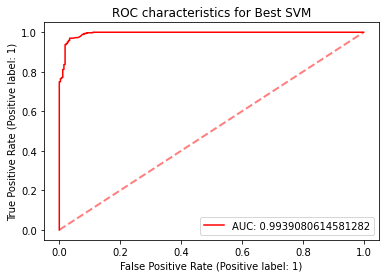

In [ ]:
fig, ax = plt.subplots()
fpr, tpr, _ = roc_curve(y_test, grid.best_estimator_.decision_function(test_LSI))
plot_roc_curve(grid.best_estimator_, test_LSI, y_test, ax=ax, color='r',label="AUC: "+str(auc(fpr,tpr))) 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.5)
plt.title('ROC characteristics for Best SVM')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


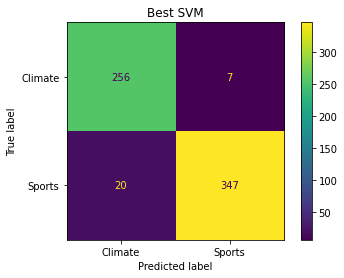

In [ ]:
plot_confusion_matrix(grid.best_estimator_, test_LSI, y_test,display_labels=['Climate','Sports'])
plt.title('Best SVM')
plt.show()

In [ ]:
print("Accuracy (best SVM):", accuracy_score(y_test,pred_cv))
print("Recall (best SVM):", recall_score(y_test,pred_cv))
print("Precision (best SVM):", precision_score(y_test,pred_cv))
print("F1-Score (best SVM):", f1_score(y_test,pred_cv))

Accuracy (best SVM): 0.9571428571428572
Recall (best SVM): 0.9455040871934605
Precision (best SVM): 0.980225988700565
F1-Score (best SVM): 0.9625520110957004


## Logistic Regression with no regularization

In [ ]:
clf_lr_wor = LogisticRegression(penalty='none',random_state=42,max_iter=100000)
pred_lr_wor = clf_lr_wor.fit(train_LSI,y_train).predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


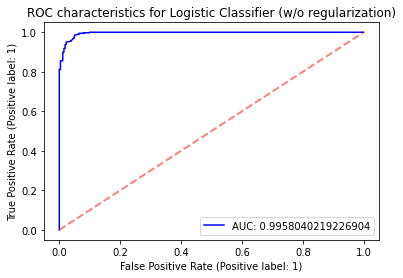

In [ ]:
fig, ax = plt.subplots()
fpr, tpr, _ = roc_curve(y_test, clf_lr_wor.decision_function(test_LSI))
plot_roc_curve(clf_lr_wor, test_LSI, y_test, ax=ax, color='b',label="AUC: "+str(auc(fpr,tpr))) 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.5)
plt.title('ROC characteristics for Logistic Classifier (w/o regularization)')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


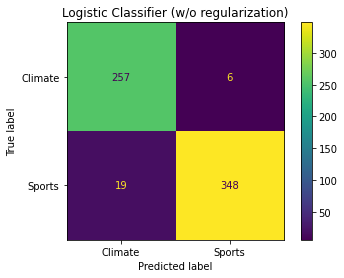

In [ ]:
plot_confusion_matrix(clf_lr_wor, test_LSI, y_test,display_labels=['Climate','Sports'])
plt.title('Logistic Classifier (w/o regularization)')
plt.show()

In [ ]:
print("Accuracy (Logistic Classifier - w/o regularization):", accuracy_score(y_test,pred_lr_wor))
print("Recall (Logistic Classifier - w/o regularization):", recall_score(y_test,pred_lr_wor))
print("Precision (Logistic Classifier - w/o regularization):", precision_score(y_test,pred_lr_wor))
print("F1-Score (Logistic Classifier - w/o regularization):", f1_score(y_test,pred_lr_wor))

Accuracy (Logistic Classifier - w/o regularization): 0.9603174603174603
Recall (Logistic Classifier - w/o regularization): 0.9482288828337875
Precision (Logistic Classifier - w/o regularization): 0.9830508474576272
F1-Score (Logistic Classifier - w/o regularization): 0.9653259361997226


## Logistic regression with L1 and L2 norms

In [ ]:
clf_lr_l1 = LogisticRegression(penalty='l1',random_state=42,solver='liblinear',max_iter=100000)
param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
grid_l1 = GridSearchCV(clf_lr_l1,param_grid,cv=5,scoring='accuracy')
grid_l1.fit(train_LSI,y_train)
pred_cv_lr_l1 = grid_l1.best_estimator_.predict(test_LSI)

In [ ]:
print('Best Value of L1 Regularization Parameter:',grid_l1.best_params_['C']) 
for l, n in zip(param_grid['C'],grid_l1.cv_results_['mean_test_score']):
    print(f'L1 Reg. Param.: {l}\t',f'Avg. Validation Accuracy: {n}')

Best Value of L1 Regularization Parameter: 100000
L1 Reg. Param.: 1e-05	 Avg. Validation Accuracy: 0.4511904761904762
L1 Reg. Param.: 0.0001	 Avg. Validation Accuracy: 0.4511904761904762
L1 Reg. Param.: 0.001	 Avg. Validation Accuracy: 0.4511904761904762
L1 Reg. Param.: 0.01	 Avg. Validation Accuracy: 0.4511904761904762
L1 Reg. Param.: 0.1	 Avg. Validation Accuracy: 0.9261904761904762
L1 Reg. Param.: 1	 Avg. Validation Accuracy: 0.9440476190476191
L1 Reg. Param.: 10	 Avg. Validation Accuracy: 0.95
L1 Reg. Param.: 100	 Avg. Validation Accuracy: 0.95
L1 Reg. Param.: 1000	 Avg. Validation Accuracy: 0.9503968253968254
L1 Reg. Param.: 10000	 Avg. Validation Accuracy: 0.9507936507936507
L1 Reg. Param.: 100000	 Avg. Validation Accuracy: 0.9511904761904763


In [ ]:
print("Accuracy (best logistic classifer with L1 regularization):", accuracy_score(y_test,pred_cv_lr_l1 ))
print("Recall (best logistic classifer with L1 regularization):", recall_score(y_test,pred_cv_lr_l1 ))
print("Precision (best logistic classifer with L1 regularization):", precision_score(y_test,pred_cv_lr_l1 ))
print("F1-Score (best logistic classifer with L1 regularization):", f1_score(y_test,pred_cv_lr_l1 ))

Accuracy (best logistic classifer with L1 regularization): 0.9603174603174603
Recall (best logistic classifer with L1 regularization): 0.9482288828337875
Precision (best logistic classifer with L1 regularization): 0.9830508474576272
F1-Score (best logistic classifer with L1 regularization): 0.9653259361997226


In [ ]:
clf_lr_l2 = LogisticRegression(penalty='l2',solver='liblinear',random_state=42)
grid_l2 = GridSearchCV(clf_lr_l2,param_grid,cv=5,scoring='accuracy')
grid_l2.fit(train_LSI,y_train)
pred_cv_lr_l2 = grid_l2.best_estimator_.predict(test_LSI)

In [ ]:
print('Best Value of L2 Regularization Parameter:',grid_l2.best_params_['C']) 
for l, n in zip(param_grid['C'],grid_l2.cv_results_['mean_test_score']):
    print(f'L2 Reg. Param.: {l}\t',f'Avg. Validation Accuracy: {n}')

Best Value of L2 Regularization Parameter: 100
L2 Reg. Param.: 1e-05	 Avg. Validation Accuracy: 0.5488095238095239
L2 Reg. Param.: 0.0001	 Avg. Validation Accuracy: 0.5488095238095239
L2 Reg. Param.: 0.001	 Avg. Validation Accuracy: 0.5488095238095239
L2 Reg. Param.: 0.01	 Avg. Validation Accuracy: 0.7265873015873016
L2 Reg. Param.: 0.1	 Avg. Validation Accuracy: 0.9246031746031745
L2 Reg. Param.: 1	 Avg. Validation Accuracy: 0.9428571428571428
L2 Reg. Param.: 10	 Avg. Validation Accuracy: 0.9515873015873015
L2 Reg. Param.: 100	 Avg. Validation Accuracy: 0.9527777777777777
L2 Reg. Param.: 1000	 Avg. Validation Accuracy: 0.9515873015873015
L2 Reg. Param.: 10000	 Avg. Validation Accuracy: 0.95
L2 Reg. Param.: 100000	 Avg. Validation Accuracy: 0.9503968253968254


In [ ]:
print("Accuracy (best logistic classifer with L2 regularization):", accuracy_score(y_test,pred_cv_lr_l2 ))
print("Recall (best logistic classifer with L2 regularization):", recall_score(y_test,pred_cv_lr_l2 ))
print("Precision (best logistic classifer with L2 regularization):", precision_score(y_test,pred_cv_lr_l2 ))
print("F1-Score (best logistic classifer with L2 regularization):", f1_score(y_test,pred_cv_lr_l2))

Accuracy (best logistic classifer with L2 regularization): 0.9587301587301588
Recall (best logistic classifer with L2 regularization): 0.9509536784741145
Precision (best logistic classifer with L2 regularization): 0.9775910364145658
F1-Score (best logistic classifer with L2 regularization): 0.9640883977900553


In [ ]:
C_list = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
accu_coeff_l1 = []
mean_coeff_l1 = []
accu_coeff_l2 = []
mean_coeff_l2 = []
for j in C_list:
    clf_lr_l1_coeff = LogisticRegression(C=j,penalty='l1',random_state=42,solver='liblinear',max_iter=100000) 
    pred_lr_l1_coeff = clf_lr_l1_coeff.fit(train_LSI,y_train).predict(test_LSI)
    accu_coeff_l1.append(accuracy_score(y_test,pred_lr_l1_coeff))
    mean_coeff_l1.append(np.mean(clf_lr_l1_coeff.coef_))
    clf_lr_l2_coeff = LogisticRegression(C=j,penalty='l2',random_state=42,solver='liblinear') 
    pred_lr_l2_coeff = clf_lr_l2_coeff.fit(train_LSI,y_train).predict(test_LSI)
    accu_coeff_l2.append(accuracy_score(y_test,pred_lr_l2_coeff))
    mean_coeff_l2.append(np.mean(clf_lr_l2_coeff.coef_))

In [ ]:
C_list

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

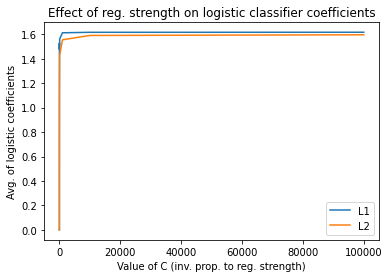

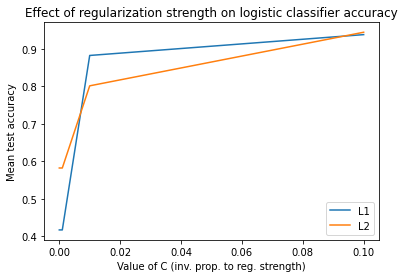

In [ ]:
fig, ax = plt.subplots()
plt.title('Effect of reg. strength on logistic classifier coefficients')
plt.plot(C_list,mean_coeff_l1,label='L1')
plt.plot(C_list,mean_coeff_l2,label='L2')
plt.xlabel('Value of C (inv. prop. to reg. strength)')
plt.ylabel('Avg. of logistic coefficients')
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.title('Effect of regularization strength on logistic classifier accuracy')
plt.plot(C_list[0:5],accu_coeff_l1[0:5],label='L1')
plt.plot(C_list[0:5],accu_coeff_l2[0:5],label='L2')
plt.xlabel('Value of C (inv. prop. to reg. strength)')
plt.ylabel('Mean test accuracy')
plt.legend()
plt.show()


In [ ]:
print(np.mean(grid_l1.best_estimator_.coef_))
print(np.mean(grid_l2.best_estimator_.coef_))

1.616533548192418
1.4291350622787382


## Naive Bayes Classifier

In [ ]:
clf_NB = GaussianNB()
pred_NB = clf_NB.fit(train_LSI, y_train).predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


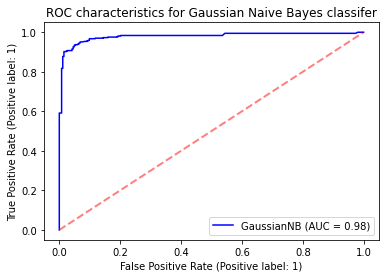

In [ ]:
fig, ax = plt.subplots()
plot_roc_curve(clf_NB, test_LSI, y_test, ax=ax, color='b') 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.5)
plt.title('ROC characteristics for Gaussian Naive Bayes classifer')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


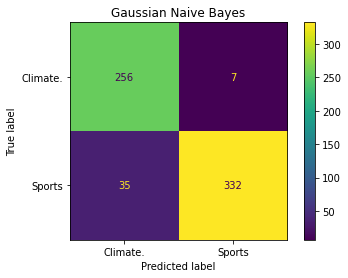

In [ ]:
plot_confusion_matrix(clf_NB, test_LSI, y_test,display_labels=['Climate.','Sports'])
plt.title('Gaussian Naive Bayes')
plt.show()

In [ ]:
print("Accuracy (Gaussian Naive Bayes):", accuracy_score(y_test,pred_NB))
print("Recall (Gaussian Naive Bayes):", recall_score(y_test,pred_NB))
print("Precision (Gaussian Naive Bayes):", precision_score(y_test,pred_NB))
print("F1-Score (Gaussian Naive Bayes):", f1_score(y_test,pred_NB))

Accuracy (Gaussian Naive Bayes): 0.9333333333333333
Recall (Gaussian Naive Bayes): 0.9046321525885559
Precision (Gaussian Naive Bayes): 0.9793510324483776
F1-Score (Gaussian Naive Bayes): 0.9405099150141643


## Pipeline Creation

In [ ]:
data=pd.read_csv("C:/Users/Tazeem Khan/Documents/UCLA/Quarter 2/Large Scale Data Mining/Project 1/Project1-Classification.csv")

In [ ]:
train, test = train_test_split(data[["full_text","root_label"]], test_size=0.2)

In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [ ]:
train= train.reset_index(drop=True)
test=  test.reset_index(drop=True)

In [ ]:
for i in range (0,len(train)):
  train['full_text'][i]=clean(train['full_text'][i])

for i in range (0,len(test)):
  test['full_text'][i]=clean(test['full_text'][i])

In [ ]:
y_train=[]
y_test=[]

In [ ]:

for label in train['root_label']:
    if label=='sports':
        y_train.append(0)
    else:
        y_train.append(1)

for label in test['root_label']:
    if label=='sports':
        y_test.append(0)
    else:
        y_test.append(1)

In [ ]:
def lemmatize_sent(text):
    return [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(nltk.word_tokenize(text))]

In [ ]:
def lemmatized(Data):
    word=(lemmatize_sent(Data))
    word=[i for i in word if not i.isdigit()]
    word=[i for i in word if i not in string.punctuation]
    return word

In [ ]:
def stem_sent(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [ ]:
def stemmed(Data):
  word=(stem_sent(Data))
  word=[i for i in word if not i.isdigit()]
  word=[i for i in word if i not in string.punctuation]
  return word

In [ ]:
steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [{'vect__min_df': (3,5),'vect__analyzer': (lemmatized,stemmed),
               'reduce_dim': (TruncatedSVD(n_components=5, random_state=42),
                              TruncatedSVD(n_components=30, random_state=42), 
                              TruncatedSVD(n_components=80, random_state=42)), 
               'clf': (svm.SVC(kernel='linear',C=500,random_state=42),
                       GaussianNB(),
                       LogisticRegression(penalty='l1',C=grid_l1.best_params_['C'],random_state=42,solver='liblinear',),
                       LogisticRegression(penalty='l2',C=grid_l2.best_params_['C'],random_state=42,solver='liblinear')),  
    }
]

grid = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy', verbose = 5)


In [ ]:
grid.fit(train['full_text'], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.933 total time= 1.2min
[CV 2/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.911 total time= 1.1min
[CV 3/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.923 total time= 1.2min
[CV 4/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=TruncatedSVD(n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.903 total time= 1.1min
[CV 5/5] END clf=SVC(C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('reduce_dim', None), ('clf', None)]),
             param_grid=[{'clf': (SVC(C=500, kernel='linear', random_state=42),
                                  GaussianNB(),
                                  LogisticRegression(C=100000, penalty='l1',
                                                     random_state=42,
                                                     solver='liblinear'),
                                  LogisticRegression(C=100, random_state=42,
                                                     solver='liblinear')),
                          'reduce_dim': (TruncatedSVD(n_components=5,
                                                      random_state=42),
                                         TruncatedSVD(n_compon

In [ ]:
print("Best estimator for Clean Data: ", grid.best_estimator_)
print("Best parameters for Clean Data: ", grid.best_params_)
print("Best score for Clean Data: ", grid.best_score_)

Best estimator for Clean Data:  Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function lemmatized at 0x0000014FDBBE5160>,
                                 min_df=5, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('reduce_dim', TruncatedSVD(n_components=80, random_state=42)),
                ('clf', SVC(C=500, kernel='linear', random_state=42))])
Best parameters for Clean Data:  {'clf': SVC(C=500, kernel='linear', random_state=42), 'reduce_dim': TruncatedSVD(n_components=80, random_state=42), 'vect__analyzer': <function lemmatized at 0x0000014FDBBE5160>, 'vect__min_df': 5}
Best score for Clean Data:  0.9587301587301587


In [ ]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

svds = grid

In [ ]:
steps = [('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', None), ('clf', None),]
pipeline = Pipeline(steps)

param_grid = [{'vect__min_df': (3,5),
               'vect__analyzer': (lemmatized,stemmed),
               'reduce_dim': (NMF(n_components=5, init='random', random_state=42, max_iter = 100000),
                              NMF(n_components=30, init='random', random_state=42, max_iter = 100000),
                              NMF(n_components=80, init='random', random_state=42, max_iter = 100000)
                              ), 
               'clf': (svm.SVC(kernel='linear',C=500,random_state=42),
                       GaussianNB(),
                       LogisticRegression(penalty='l1',C=grid_l1.best_params_['C'],random_state=42,solver='liblinear',),
                       LogisticRegression(penalty='l2',C=grid_l2.best_params_['C'],random_state=42,solver='liblinear')),  
    }
]

grid2 = GridSearchCV(pipeline, cv = 5, param_grid = param_grid, scoring = 'accuracy',verbose = 5)

In [ ]:
grid2.fit(train['full_text'], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.915 total time= 1.1min
[CV 2/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.853 total time= 1.1min
[CV 3/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at 0x0000014FDBBE5160>, vect__min_df=3;, score=0.823 total time= 1.1min
[CV 4/5] END clf=SVC(C=500, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=100000, n_components=5, random_state=42), vect__analyzer=<function lemmatized at

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('reduce_dim', None), ('clf', None)]),
             param_grid=[{'clf': (SVC(C=500, kernel='linear', random_state=42),
                                  GaussianNB(),
                                  LogisticRegression(C=100000, penalty='l1',
                                                     random_state=42,
                                                     solver='liblinear'),
                                  LogisticRegression(C=100, random_state=42,
                                                     s...
                          'reduce_dim': (NMF(init='random', max_iter=100000,
                                             n_components=5, random_state=42),
                                         NMF(init='random', max_i

In [ ]:
print("Best estimator for Clean Data: ", grid2.best_estimator_)
print("Best parameters for Clean Data: ", grid2.best_params_)
print("Best score for Clean Data: ", grid2.best_score_)

Best estimator for Clean Data:  Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function lemmatized at 0x0000014FDBBE5160>,
                                 min_df=5, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('reduce_dim',
                 NMF(init='random', max_iter=100000, n_components=80,
                     random_state=42)),
                ('clf', SVC(C=500, kernel='linear', random_state=42))])
Best parameters for Clean Data:  {'clf': SVC(C=500, kernel='linear', random_state=42), 'reduce_dim': NMF(init='random', max_iter=100000, n_components=80, random_state=42), 'vect__analyzer': <function lemmatized at 0x0000014FDBBE5160>, 'vect__min_df': 5}
Best score for Clean Data:  0.9571428571428571


In [ ]:
results_df2 = pd.DataFrame(grid2.cv_results_)
results_df2 = results_df2.sort_values(by=["rank_test_score"])
results_df2[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
9,"{'clf': SVC(C=500, kernel='linear', random_sta...",1,0.957143,0.006711
20,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",1,0.957143,0.008474
23,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",3,0.956746,0.005668
33,"{'clf': LogisticRegression(C=100000, penalty='...",3,0.956746,0.007776
35,"{'clf': LogisticRegression(C=100000, penalty='...",5,0.956349,0.004347
22,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",6,0.955952,0.005082
11,"{'clf': SVC(C=500, kernel='linear', random_sta...",7,0.955556,0.002381
34,"{'clf': LogisticRegression(C=100000, penalty='...",8,0.955159,0.006349
32,"{'clf': LogisticRegression(C=100000, penalty='...",9,0.954762,0.007674
8,"{'clf': SVC(C=500, kernel='linear', random_sta...",10,0.954365,0.010039


In [ ]:
final_results_df=pd.concat([results_df,results_df2])
final_results_df = final_results_df.sort_values(by=["rank_test_score"])
final_results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
9,"{'clf': SVC(C=500, kernel='linear', random_sta...",1,0.958730,0.002916
20,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",1,0.957143,0.008474
9,"{'clf': SVC(C=500, kernel='linear', random_sta...",1,0.957143,0.006711
35,"{'clf': LogisticRegression(C=100000, penalty='...",2,0.957937,0.004047
8,"{'clf': SVC(C=500, kernel='linear', random_sta...",2,0.957937,0.002916


In [ ]:
final_results_df.to_csv("C:/Users/Tazeem Khan/Documents/UCLA/Quarter 2/Large Scale Data Mining/Project 1/final_results.csv")

In [ ]:
results_df=pd.read_csv("C:/Users/Tazeem Khan/Documents/UCLA/Quarter 2/Large Scale Data Mining/Project 1/final_results.csv")

In [ ]:
results_df = results_df.sort_values(by=["mean_test_score"], ascending = False)

In [ ]:
top5 = results_df[["param_clf", "param_reduce_dim", "param_vect__analyzer", "param_vect__min_df", "mean_test_score"]].head()
top5.reset_index(drop=True, inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
top5

,param_clf,param_reduce_dim,param_vect__analyzer,param_vect__min_df,mean_test_score
0,"SVC(C=500, kernel='linear', random_state=42)","TruncatedSVD(n_components=80, random_state=42)",<function lemmatized at 0x0000014FDBBE5160>,5,0.958730
1,"LogisticRegression(C=100000, penalty='l1', random_state=42, solver='liblinear')","TruncatedSVD(n_components=80, random_state=42)",<function stemmed at 0x0000014FE7C9C040>,5,0.957937
2,"SVC(C=500, kernel='linear', random_state=42)","TruncatedSVD(n_components=80, random_state=42)",<function lemmatized at 0x0000014FDBBE5160>,3,0.957937
3,"LogisticRegression(C=100000, penalty='l1', random_state=42, solver='liblinear')","TruncatedSVD(n_components=80, random_state=42)",<function stemmed at 0x0000014FE7C9C040>,3,0.957937
4,"LogisticRegression(C=100, random_state=42, solver='liblinear')","TruncatedSVD(n_components=80, random_state=42)",<function stemmed at 0x0000014FE7C9C040>,5,0.957937


In [ ]:
Test_Score=[]

In [ ]:
steps = [('vect', CountVectorizer(stop_words='english', min_df=5, analyzer=lemmatized)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=80, random_state=42)), ('clf',svm.SVC(C=500, kernel='linear', random_state=42) )]
pipeline = Pipeline(steps)

In [ ]:
y_pred = pipeline.fit(train['full_text'], y_train).predict(test['full_text'])
acc = accuracy_score(y_test, y_pred)
print(acc)
Test_Score.append(acc)

0.953968253968254


In [ ]:
steps = [('vect', CountVectorizer(stop_words='english', min_df=5, analyzer=stemmed)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=80, random_state=42)), ('clf',LogisticRegression(C=100000, penalty='l1', random_state=42, solver='liblinear') )]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], y_train).predict(test['full_text'])
acc = accuracy_score(y_test, y_pred)
print(acc)
Test_Score.append(acc)


0.9476190476190476


In [ ]:
steps = [('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=lemmatized)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=80, random_state=42)), ('clf',svm.SVC(C=500, kernel='linear', random_state=42) )]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], y_train).predict(test['full_text'])
acc = accuracy_score(y_test, y_pred)
print(acc)
Test_Score.append(acc)

0.9523809523809523


In [ ]:
steps = [('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=stemmed)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=80, random_state=42)), ('clf',LogisticRegression(C=100000, penalty='l1', random_state=42, solver='liblinear') )]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], y_train).predict(test['full_text'])
acc = accuracy_score(y_test, y_pred)
print(acc)
Test_Score.append(acc)

0.9476190476190476


In [ ]:
steps = [('vect', CountVectorizer(stop_words='english', min_df=5, analyzer=stemmed)), ('tfidf', TfidfTransformer(use_idf=True)), ('reduce_dim', TruncatedSVD(n_components=80, random_state=42)), ('clf',LogisticRegression(C=100, random_state=42, solver='liblinear') )]
pipeline = Pipeline(steps)

y_pred = pipeline.fit(train['full_text'], y_train).predict(test['full_text'])
acc = accuracy_score(y_test, y_pred)
print(acc)
Test_Score.append(acc)

0.9492063492063492


In [ ]:
top5['Test Scores']=Test_Score

In [ ]:
top5 = top5.sort_values(by=["Test Scores"], ascending = False)

In [ ]:
top5

,param_clf,param_reduce_dim,param_vect__analyzer,param_vect__min_df,mean_test_score,Test Scores
0,"SVC(C=500, kernel='linear', random_state=42)","TruncatedSVD(n_components=80, random_state=42)",<function lemmatized at 0x0000014FDBBE5160>,5,0.958730,0.953968
2,"SVC(C=500, kernel='linear', random_state=42)","TruncatedSVD(n_components=80, random_state=42)",<function lemmatized at 0x0000014FDBBE5160>,3,0.957937,0.952381
4,"LogisticRegression(C=100, random_state=42, solver='liblinear')","TruncatedSVD(n_components=80, random_state=42)",<function stemmed at 0x0000014FE7C9C040>,5,0.957937,0.949206
1,"LogisticRegression(C=100000, penalty='l1', random_state=42, solver='liblinear')","TruncatedSVD(n_components=80, random_state=42)",<function stemmed at 0x0000014FE7C9C040>,5,0.957937,0.947619
3,"LogisticRegression(C=100000, penalty='l1', random_state=42, solver='liblinear')","TruncatedSVD(n_components=80, random_state=42)",<function stemmed at 0x0000014FE7C9C040>,3,0.957937,0.947619


# Multiclass Classification


In [ ]:
map_row_to_class ={"chess":0,"cricket":1,"hockey":2,"soccer":3,
"football":4,"%22forest%20fire%22":5,"flood":6,"earthquake":7,
"drought":8}

In [ ]:
data_multi=data

In [ ]:
data_multi['leaf_label']=data['leaf_label'].replace(map_row_to_class)

In [ ]:
data_multi

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,2,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,2,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,2,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,2,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,2,sports
...,...,...,...,...,...,...,...,...
3145,'By Rachel Premack of FreightWaves\n\nYou prob...,'Right now the barge industry — and all of us ...,"['coal', 'traffic', 'right', 'mississippi', 's...",NaN,['Tyler Durden'],https://www.zerohedge.com/markets/latest-suppl...,8,climate
3146,'Manufacturing had a big summer. The CHIPS and...,'To address these issues and drive the transit...,"['manufacturing', 'system', 'future', 'technol...",NaN,['Mary Beth Gallagher'],https://news.mit.edu/2022/manufacturing-cleane...,8,climate
3147,"'A golf cart on a path at Verrado, an 8,800-ac...",'Water flow has dropped precipitously in the C...,"['developers', 'live', 'state', 'development',...",NaN,['Keith Schneider'],https://news.yahoo.com/thousands-live-one-day-...,8,climate
3148,"'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","['rohingyas', 'told', 'indonesia', 'refugees',...",NaN,['Online News Editor'],https://www.laprensalatina.com/dozens-of-rohin...,8,climate


In [ ]:
train, test = train_test_split(data_multi[["full_text","leaf_label"]], test_size=0.2)

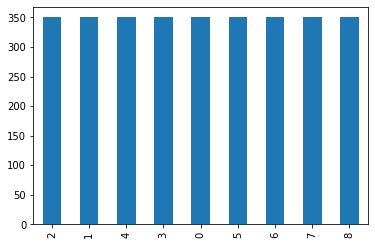

In [ ]:
data['leaf_label'].value_counts().plot(kind='bar')

In [ ]:
data['leaf_label'].value_counts()

2    350
1    350
4    350
3    350
0    350
5    350
6    350
7    350
8    350
Name: leaf_label, dtype: int64

In [ ]:
print("Number of samples in Training dataset:",train.shape[0])
print("Number of samples in Testing dataset:",test.shape[0])

Number of samples in Training dataset: 2520
Number of samples in Testing dataset: 630


In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [ ]:
train= train.reset_index(drop=True)
test=  test.reset_index(drop=True)

In [ ]:
for i in range (0,len(train)):
  train['full_text'][i]=clean(train['full_text'][i])

for i in range (0,len(test)):
  test['full_text'][i]=clean(test['full_text'][i])

<ipython-input-111-ad79b8a1c82b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['full_text'][i]=clean(train['full_text'][i])
<ipython-input-111-ad79b8a1c82b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['full_text'][i]=clean(test['full_text'][i])


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

In [ ]:
def lemmatize_sent(text):
    return [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(nltk.word_tokenize(text))]

In [ ]:
train['lemmatized_full_text']=''
test['lemmatized_full_text']=''

for i in range (0, len(train)):
  train['lemmatized_full_text'][i]=" ".join(lemmatize_sent(train['full_text'][i]))

for i in range (0, len(test)):
  test['lemmatized_full_text'][i]=" ".join(lemmatize_sent(test['full_text'][i]))

<ipython-input-115-3b86fca2f186>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lemmatized_full_text'][i]=" ".join(lemmatize_sent(train['full_text'][i]))
<ipython-input-115-3b86fca2f186>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lemmatized_full_text'][i]=" ".join(lemmatize_sent(test['full_text'][i]))


In [ ]:
test

,full_text,leaf_label,lemmatized_full_text
0,'The 2022 Missouri Valley Conference Men's Soc...,3,'the 2022 missouri valley conference men 's so...
1,'ESPN announced Tuesday that it had hired form...,4,'espn announce tuesday that it have hire forme...
2,"'DataVerify Flood Services, a leading provider...",6,"'dataverify flood service , a lead provider of..."
3,'About Photo #4851708: Gerard Pique retired fr...,3,'about photo # 4851708 : gerard pique retire f...
4,"'About Photo #4837931: Catherine, Princess of ...",4,"'about photo # 4837931 : catherine , princess ..."
...,...,...,...
625,'While a drought watch was lifted Thursday for...,8,'while a drought watch be lift thursday for 15...
626,'Spatial agreement between reconstructed and m...,8,'spatial agreement between reconstruct and mea...
627,"'The 2022 World Cup begins next month, which w...",3,"'the 2022 world cup begin next month , which w..."
628,'Many other details remain unknown. How often ...,7,'many other detail remain unknown . how often ...


In [ ]:
cv = CountVectorizer(stop_words='english',min_df=3)
result_count_vectorizer_train= cv.fit_transform(train['lemmatized_full_text'])
result_count_vectorizer_test = cv.transform(test['lemmatized_full_text'])

In [ ]:
tfidf_trans = TfidfTransformer(use_idf=True)

train_tfidf = tfidf_trans.fit_transform(result_count_vectorizer_train) # making the tfidf train matrix
print("Shape of TF-IDF train matrix: ", train_tfidf.shape)

test_tfidf = tfidf_trans.transform(result_count_vectorizer_test) # transforming the test data into the tfidf test matrix
print("Shape of TF-IDF test matrix: ", test_tfidf.shape)

Shape of TF-IDF train matrix:  (2520, 14691)
Shape of TF-IDF test matrix:  (630, 14691)


In [ ]:
i=50

In [ ]:
LSI = TruncatedSVD(n_components=i, random_state=42)

train_LSI = LSI.fit_transform(train_tfidf) # performing LSI on the tfidf train matrix
test_LSI = LSI.transform(test_tfidf)

exp_var_LSI = LSI.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_LSI)

In [ ]:
U_tr,S_tr,V_tr = randomized_svd(train_tfidf,n_components=50,random_state=42)
U_te,S_te,V_te = randomized_svd(test_tfidf,n_components=50,random_state=42)

In [ ]:
print('LSI (train) error:',np.sum(np.array(train_tfidf - (U_tr.dot(np.diag(S_tr)).dot(V_tr)))**2))
print('LSI (test) error:',np.sum(np.array(test_tfidf - (U_te.dot(np.diag(S_te)).dot(V_te)))**2))

LSI (train) error: 1685.3470582982495
LSI (test) error: 388.37778217647053


In [ ]:
y_train=train['leaf_label']
y_test=test['leaf_label']

## Naive Bayes MultiClass

In [ ]:
clf_NB = GaussianNB()
pred_NB = clf_NB.fit(train_LSI, y_train).predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


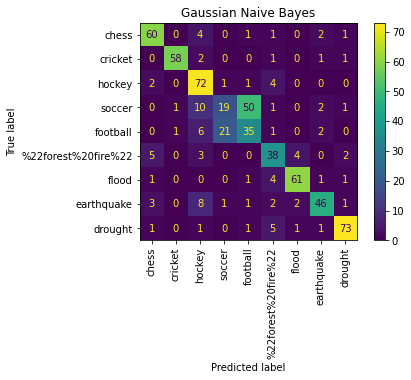

In [ ]:
plot_confusion_matrix(clf_NB, test_LSI, y_test,display_labels=["chess","cricket","hockey","soccer","football","%22forest%20fire%22","flood","earthquake","drought"],xticks_rotation='vertical')
plt.title('Gaussian Naive Bayes')
plt.show()

In [ ]:
print("Accuracy (Gaussian Naive Bayes):", accuracy_score(y_test,pred_NB))
print(metrics.classification_report(y_test,pred_NB))

Accuracy (Gaussian Naive Bayes): 0.7333333333333333
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        69
           1       0.97      0.92      0.94        63
           2       0.68      0.90      0.77        80
           3       0.45      0.23      0.30        84
           4       0.39      0.53      0.45        66
           5       0.67      0.73      0.70        52
           6       0.90      0.88      0.89        69
           7       0.84      0.72      0.77        64
           8       0.91      0.88      0.90        83

    accuracy                           0.73       630
   macro avg       0.74      0.74      0.73       630
weighted avg       0.73      0.73      0.72       630



## SVM Multiclass One Vs Rest

In [ ]:
svm_ovr =  OneVsRestClassifier(svm.LinearSVC(random_state=42,C=100,max_iter=100000)).fit(train_LSI,y_train)
pred_ovr = svm_ovr.predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


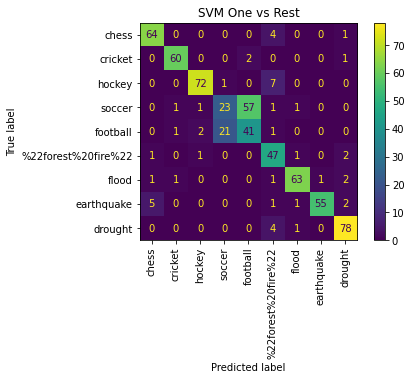

In [ ]:
plot_confusion_matrix(svm_ovr, test_LSI, y_test,display_labels=["chess","cricket","hockey","soccer","football","%22forest%20fire%22","flood","earthquake","drought"],xticks_rotation='vertical')
plt.title('SVM One vs Rest')
plt.show()

In [ ]:
print("Accuracy (SVM One vs Rest):", accuracy_score(y_test,pred_ovr))
print(metrics.classification_report(y_test,pred_ovr))

Accuracy (SVM One vs Rest): 0.7984126984126985
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        69
           1       0.95      0.95      0.95        63
           2       0.95      0.90      0.92        80
           3       0.51      0.27      0.36        84
           4       0.41      0.62      0.49        66
           5       0.71      0.90      0.80        52
           6       0.94      0.91      0.93        69
           7       0.98      0.86      0.92        64
           8       0.91      0.94      0.92        83

    accuracy                           0.80       630
   macro avg       0.81      0.81      0.80       630
weighted avg       0.81      0.80      0.79       630



## SVM Multiclass One Vs One

In [ ]:
svm_ovo = OneVsOneClassifier(svm.LinearSVC(random_state=42,C=100,max_iter=100000)).fit(train_LSI,y_train)
pred_ovo = svm_ovo.predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


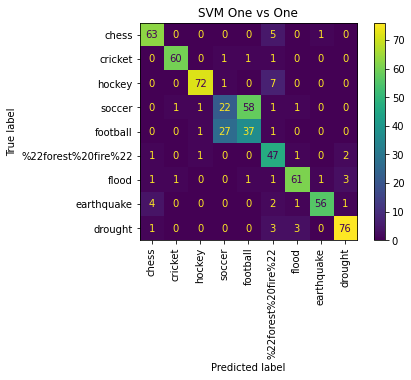

In [ ]:
plot_confusion_matrix(svm_ovo, test_LSI, y_test,display_labels=["chess","cricket","hockey","soccer","football","%22forest%20fire%22","flood","earthquake","drought"],xticks_rotation='vertical')
plt.title('SVM One vs One')
plt.show()

In [ ]:
print("Accuracy (SVM One vs One):", accuracy_score(y_test,pred_ovo))
print(metrics.classification_report(y_test,pred_ovo))

Accuracy (SVM One vs One): 0.7841269841269841
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.97      0.95      0.96        63
           2       0.96      0.90      0.93        80
           3       0.43      0.26      0.33        84
           4       0.38      0.56      0.45        66
           5       0.69      0.90      0.78        52
           6       0.91      0.88      0.90        69
           7       0.97      0.88      0.92        64
           8       0.93      0.92      0.92        83

    accuracy                           0.78       630
   macro avg       0.79      0.80      0.79       630
weighted avg       0.79      0.78      0.78       630



## Subsampling to deal with class imbalance

In [ ]:
subsampling_label_train=[]
subsampling_label_test=[]

In [ ]:
for label in train['leaf_label']:
  if label == 3 or label== 4:
    subsampling_label_train.append(3)
  elif label == 5 or label==8:
    subsampling_label_train.append(5)
  else:
    subsampling_label_train.append(label)

for label in test["leaf_label"]:
  if label == 3 or label== 4:
    subsampling_label_test.append(3)
  elif label == 5 or label==8:
    subsampling_label_test.append(5)
  else:
    subsampling_label_test.append(label)

In [ ]:
new_class_names = ["chess","cricket","hockey","soccer/football","%22forest%20fire%22/drought","flood","earthquake"]

## Naive Bayes MultiClass (After Subsampling)

In [ ]:
len(subsampling_label_train)

2520

In [ ]:
train_LSI.shape

(2520, 50)

In [ ]:
clf_NB = GaussianNB()
pred_NB = clf_NB.fit(train_LSI, subsampling_label_train).predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


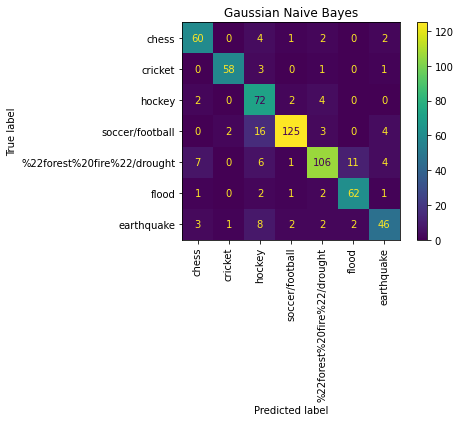

In [ ]:
plot_confusion_matrix(clf_NB, test_LSI,subsampling_label_test ,display_labels=new_class_names,xticks_rotation='vertical')
plt.title('Gaussian Naive Bayes')
plt.show()

In [ ]:
print("Accuracy (Gaussian Naive Bayes):", accuracy_score(subsampling_label_test,pred_NB))
print(metrics.classification_report(subsampling_label_test,pred_NB))

Accuracy (Gaussian Naive Bayes): 0.8396825396825397
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        69
           1       0.95      0.92      0.94        63
           2       0.65      0.90      0.75        80
           3       0.95      0.83      0.89       150
           5       0.88      0.79      0.83       135
           6       0.83      0.90      0.86        69
           7       0.79      0.72      0.75        64

    accuracy                           0.84       630
   macro avg       0.84      0.85      0.84       630
weighted avg       0.85      0.84      0.84       630



## SVM Multiclass One Vs Rest (After Subsampling)

In [ ]:
svm_ovr =  OneVsRestClassifier(svm.LinearSVC(random_state=42,C=100,max_iter=100000)).fit(train_LSI,subsampling_label_train)
pred_ovr = svm_ovr.predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


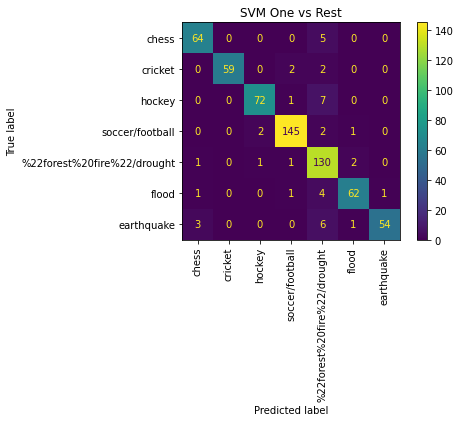

In [ ]:
plot_confusion_matrix(svm_ovr, test_LSI, subsampling_label_test,display_labels=new_class_names,xticks_rotation='vertical')
plt.title('SVM One vs Rest')
plt.show()

In [ ]:
print("Accuracy (SVM One vs Rest):", accuracy_score(subsampling_label_test,pred_ovr))
print(metrics.classification_report(subsampling_label_test,pred_ovr))

Accuracy (SVM One vs Rest): 0.9301587301587302
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       1.00      0.94      0.97        63
           2       0.96      0.90      0.93        80
           3       0.97      0.97      0.97       150
           5       0.83      0.96      0.89       135
           6       0.94      0.90      0.92        69
           7       0.98      0.84      0.91        64

    accuracy                           0.93       630
   macro avg       0.94      0.92      0.93       630
weighted avg       0.93      0.93      0.93       630



## SVM Multiclass One Vs One (After Subsampling)

In [ ]:
svm_ovo = OneVsOneClassifier(svm.LinearSVC(random_state=42,C=100,max_iter=100000)).fit(train_LSI,subsampling_label_train)
pred_ovo = svm_ovo.predict(test_LSI)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


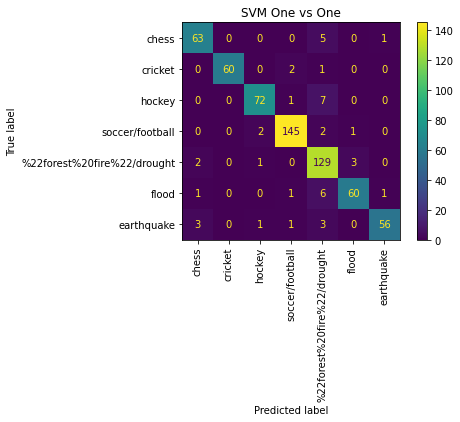

In [ ]:
plot_confusion_matrix(svm_ovo, test_LSI,subsampling_label_test,display_labels=new_class_names,xticks_rotation='vertical')
plt.title('SVM One vs One')
plt.show()

In [ ]:
print("Accuracy (SVM One vs One):", accuracy_score(subsampling_label_test,pred_ovo))
print(metrics.classification_report(subsampling_label_test,pred_ovo))

Accuracy (SVM One vs One): 0.9285714285714286
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        69
           1       1.00      0.95      0.98        63
           2       0.95      0.90      0.92        80
           3       0.97      0.97      0.97       150
           5       0.84      0.96      0.90       135
           6       0.94      0.87      0.90        69
           7       0.97      0.88      0.92        64

    accuracy                           0.93       630
   macro avg       0.94      0.92      0.93       630
weighted avg       0.93      0.93      0.93       630



# Glove Embeddings

In [ ]:
!wget "https://nlp.stanford.edu/data/glove.6B.zip"
!unzip glove.6B.zip

--2023-01-29 06:14:52--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-29 06:14:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2023-01-29 06:17:32 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [ ]:
# Importing Glove module
embeddings_dict_300 = {}
embeddings_dict_200 = {}
embeddings_dict_100 = {}
embeddings_dict_50 = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f_300:
  for line_300 in f_300:
    values_300 = line_300.split()
    word_300 = values_300[0]
    vector_300 = np.asarray(values_300[1:], "float32")
    embeddings_dict_300[word_300] = vector_300
with open("glove.6B.200d.txt", 'r') as f_200:
  for line_200 in f_200:
    values_200 = line_200.split()
    word_200 = values_200[0]
    vector_200 = np.asarray(values_200[1:], "float32")
    embeddings_dict_200[word_200] = vector_200
with open("glove.6B.100d.txt", 'r') as f_100:
  for line_100 in f_100:
    values_100 = line_100.split()
    word_100 = values_100[0]
    vector_100 = np.asarray(values_100[1:], "float32")
    embeddings_dict_100[word_100] = vector_100
with open("glove.6B.50d.txt", 'r') as f_50:
  for line_50 in f_50:
    values_50 = line_50.split()
    word_50 = values_50[0]
    vector_50 = np.asarray(values_50[1:], "float32")
    embeddings_dict_50[word_50] = vector_50
embeddings_dict_dict = {100: embeddings_dict_100, 200: embeddings_dict_200, 300: embeddings_dict_300, 50: embeddings_dict_50}

In [ ]:
# Defining similar words function

def find_similar_word(emmbedes):
  nearest = sorted(embeddings_dict_300.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict_300[word], emmbedes))
  return nearest

find_similar_word((embeddings_dict_300["king"] + embeddings_dict_300["queen"])/2)[1:10]

['queen',
 'monarch',
 'elizabeth',
 'prince',
 'crown',
 'ii',
 'kingdom',
 'prohertrib',
 'princess']

In [ ]:
print(np.linalg.norm(embeddings_dict_300['queen']-embeddings_dict_300['king']-embeddings_dict_300['wife']+embeddings_dict_300['husband']))
print(np.linalg.norm(embeddings_dict_300['queen']-embeddings_dict_300['king']))
print(np.linalg.norm(embeddings_dict_300['wife']-embeddings_dict_300['husband']))

6.1650367
5.966258
3.1520464


In [ ]:
# Loading Data and splitting it
ur  = "https://drive.google.com/u/2/uc?id=1twYn-rIatKO0L-cduJIkd8ewIfJxXABz&export=download"
data = pd.read_csv(ur, header = 0)
import random
np.random.seed(42)
random.seed(42)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
train1=train
test1=test
print(train.shape[0], test.shape[0])

2520 630


In [ ]:
# Cleaning the text and removing numbers from text
# Converting each sentence into a vector of fixed length
train= train.reset_index(drop=True)
test=  test.reset_index(drop=True)
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

for i in range (len(train)):
  train['full_text'][i]=clean(train['full_text'][i])

for i in range (0,len(test)):
  test['full_text'][i]=clean(test['full_text'][i])
import string
for i in range (0,len(train)):
  sent=[i for i in train['full_text'][i] if not i.isdigit()]
  sent = [i for i in train['full_text'][i] if i not in string.punctuation]
  train['full_text'][i]= "".join(sent)

for i in range (0,len(test)):
  sent=[i for i in test['full_text'][i] if not i.isdigit()]
  sent = [i for i in test['full_text'][i] if i not in string.punctuation]
  test['full_text'][i]= "".join(sent)


lemmatizer = WordNetLemmatizer()
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
def lemmatize_sent(text):
    return [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(nltk.word_tokenize(text))]
train['lemmatized_full_text']=''
test['lemmatized_full_text']=''

for i in range (0, len(train)):
  train['lemmatized_full_text'][i]=" ".join(lemmatize_sent(train['full_text'][i]))

for i in range (0, len(test)):
  test['lemmatized_full_text'][i]=" ".join(lemmatize_sent(test['full_text'][i]))

C = 0.00001: 0.548809524 accuracy with a standard deviation of 0.00097
C = 0.00010: 0.548809524 accuracy with a standard deviation of 0.00097
C = 0.00100: 0.548809524 accuracy with a standard deviation of 0.00097
C = 0.01000: 0.914285714 accuracy with a standard deviation of 0.01090
C = 0.10000: 0.931746032 accuracy with a standard deviation of 0.01147
C = 1.00000: 0.946428571 accuracy with a standard deviation of 0.01079
C = 10.00000: 0.950000000 accuracy with a standard deviation of 0.01257
C = 100.00000: 0.942460317 accuracy with a standard deviation of 0.00996
C = 1000.00000: 0.940079365 accuracy with a standard deviation of 0.01232
C = 10000.00000: 0.940079365 accuracy with a standard deviation of 0.01232
C = 100000.00000: 0.940079365 accuracy with a standard deviation of 0.01232
best C = 10.00000


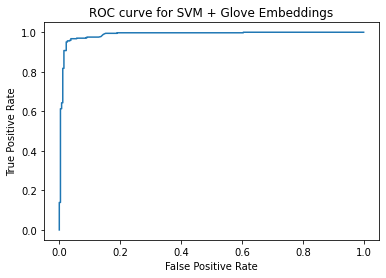

Accuracy of best SVM: 0.962
Precision of best SVM: 0.972
Recall of best SVM: 0.962
F1 Score of best SVM: 0.967


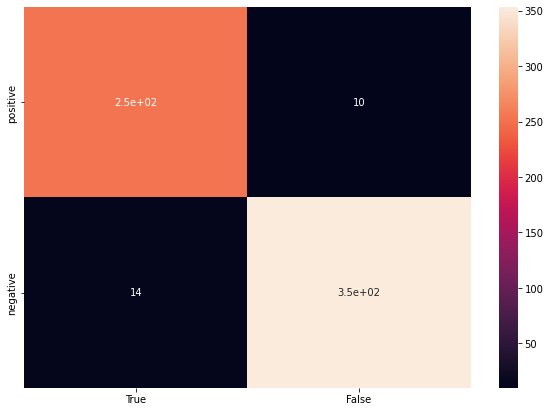

In [ ]:
def glove_sent2vec(data, vector_length):
  embeddings_dict = embeddings_dict_dict[vector_length]
  dim = vector_length
  ave_vec_total = np.zeros((len(data), dim))
  n = 0
  for sentence in data['lemmatized_full_text']:
    word_mix = sentence.split()
    vectors = []
    for word in word_mix:
      try:
        vec = embeddings_dict[word]
        vectors.append(vec)
      except KeyError:
        pass
    if len(vectors) > 0:
      vectors = np.array(vectors)
      ave_vec_total[n] = vectors.mean(axis=0)
    n += 1
  return ave_vec_total

train_glove_scores = glove_sent2vec(train,300)
test_glove_scores = glove_sent2vec(test,300)
c = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
good_c = 0.00001
highest_accuracy = 0
for b in c:
  glove_svm = SVC(C = b, kernel='linear', random_state=42)
  cv_scores = cross_val_score(glove_svm, train_glove_scores, train["root_label"], cv=5)
  print("C = %0.5f: %0.9f accuracy with a standard deviation of %0.5f" % (b, cv_scores.mean(), cv_scores.std()))
  if cv_scores.mean() > highest_accuracy:
    highest_accuracy = cv_scores.mean()
    good_c = b
print("best C = %0.5f" % (good_c))
svm_glove = SVC(C = good_c, kernel='linear', random_state=42)
y_pred = svm_glove.fit(train_glove_scores, train["root_label"]).predict(test_glove_scores)
svm_cm = confusion_matrix(test["root_label"], y_pred)

#Function for plotting confusion matrix

fprh, tprh, _ = metrics.roc_curve(test["root_label"], svm_glove.decision_function(test_glove_scores), pos_label="climate")
plt.plot(tprh,fprh)
plt.title('ROC curve for SVM + Glove Embeddings')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

conf_matrix_svm = confusion_matrix(y_true= test["root_label"], y_pred=y_pred)
df_cmsvm = pd.DataFrame(conf_matrix_svm, index = [i for i in ["positive", "negative"]],columns = [i for i in ['True', 'False']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cmsvm, annot=True)

print('Accuracy of best SVM: %.3f' % accuracy_score(test["root_label"], y_pred))
print('Precision of best SVM: %.3f' % precision_score(test["root_label"], y_pred, pos_label="sports"))
print('Recall of best SVM: %.3f' % recall_score(test["root_label"], y_pred, pos_label="sports"))
print('F1 Score of best SVM: %.3f' % f1_score(test["root_label"], y_pred, pos_label="sports"))

Accuracy on test data for embedding vector length of 50 is 0.94444
Accuracy on test data for embedding vector length of 100 is 0.95079
Accuracy on test data for embedding vector length of 200 is 0.95397
Accuracy on test data for embedding vector length of 300 is 0.96190


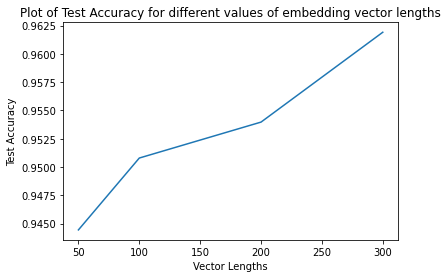

In [ ]:
test_accuracy = []
test_data_vectorized = []
train_data_vectorized = []
svm_models = []
vector_lengths = [50,100,200,300]
for i in vector_lengths:
  train_data_vectorized.append(glove_sent2vec(train,i))
  test_data_vectorized.append(glove_sent2vec(test,i))
for i in range(len(test_data_vectorized)):
  svm_models.append(SVC(C = 10, kernel='linear', random_state=42))
  test_accuracy.append(accuracy_score(test["root_label"], svm_models[i].fit(train_data_vectorized[i], train["root_label"]).predict(test_data_vectorized[i])))
  print("Accuracy on test data for embedding vector length of %d is %0.5f" % (vector_lengths[i],test_accuracy[i]))
plt.plot(vector_lengths, test_accuracy)
plt.xlabel('Vector Lengths')
plt.ylabel('Test Accuracy')
plt.title('Plot of Test Accuracy for different values of embedding vector lengths')
plt.show()

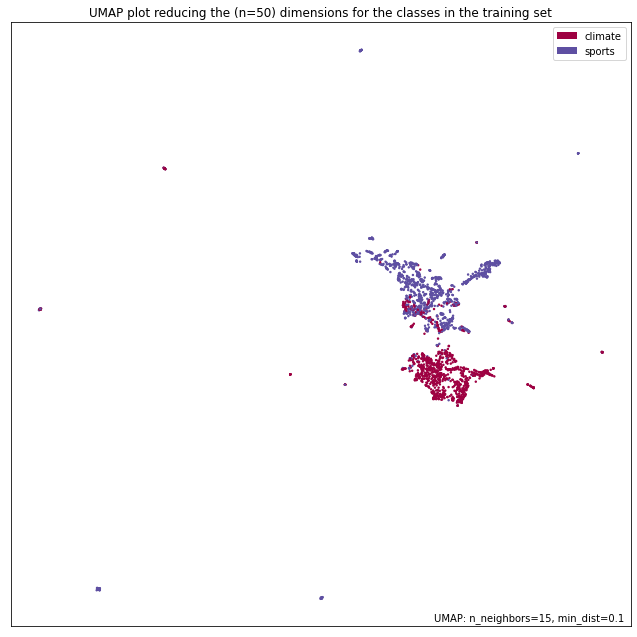

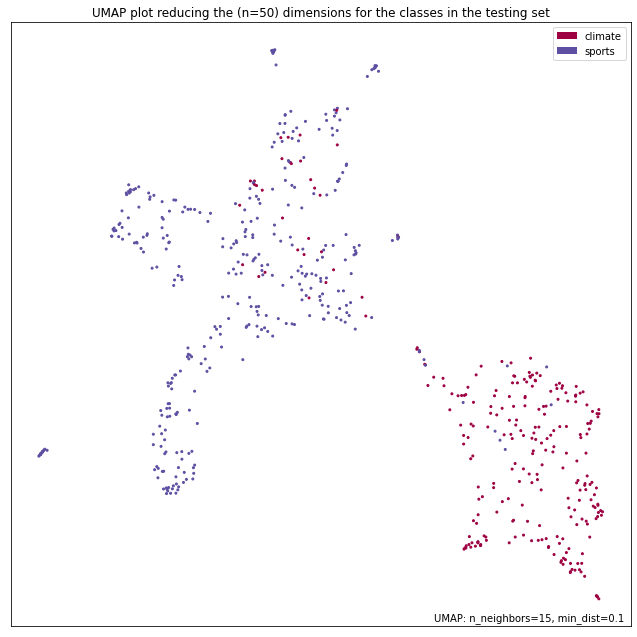

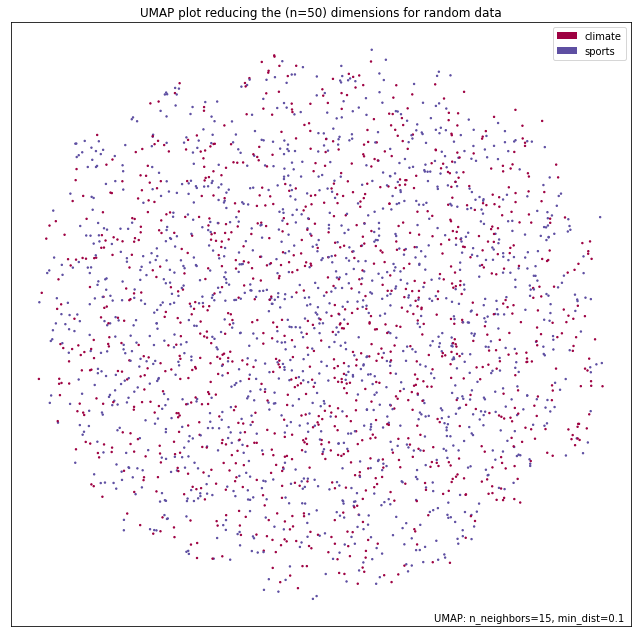

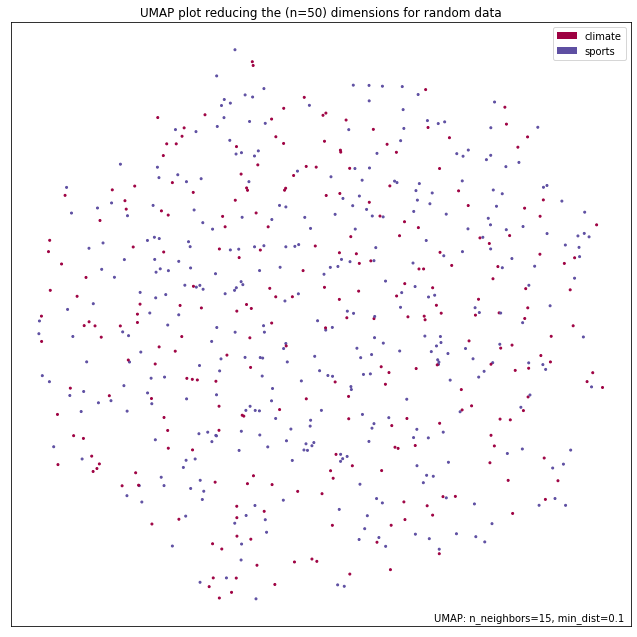

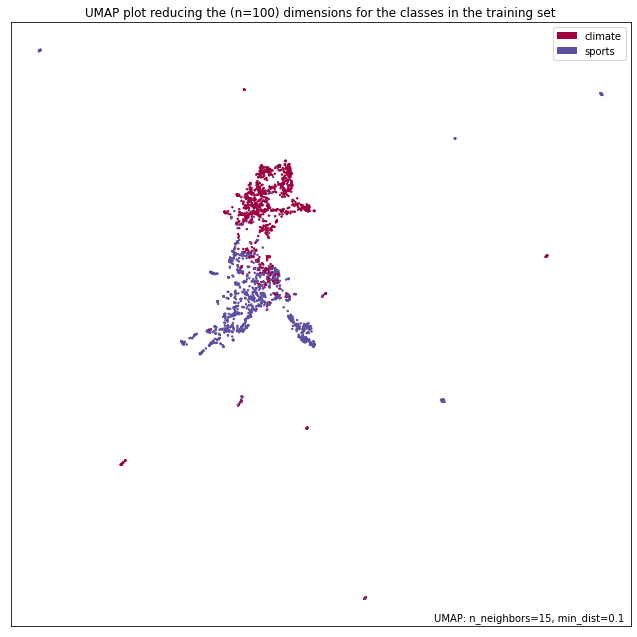

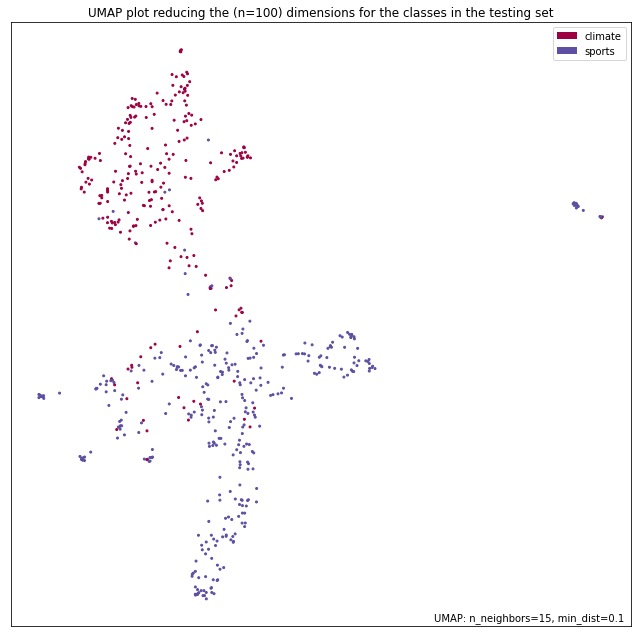

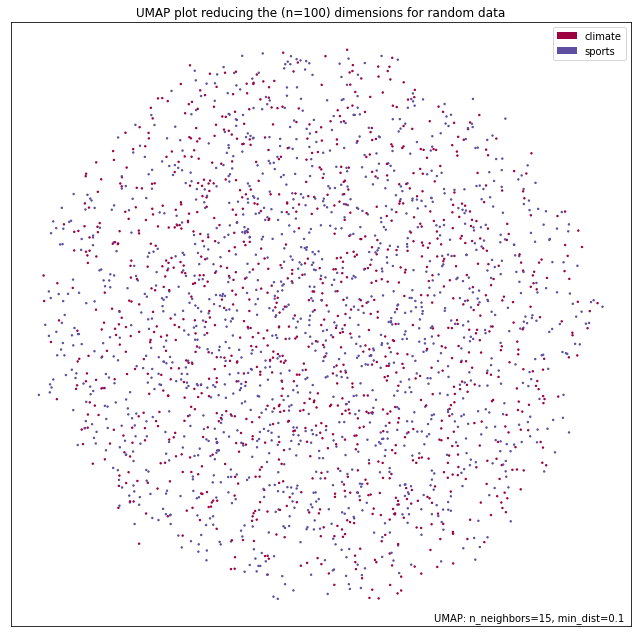

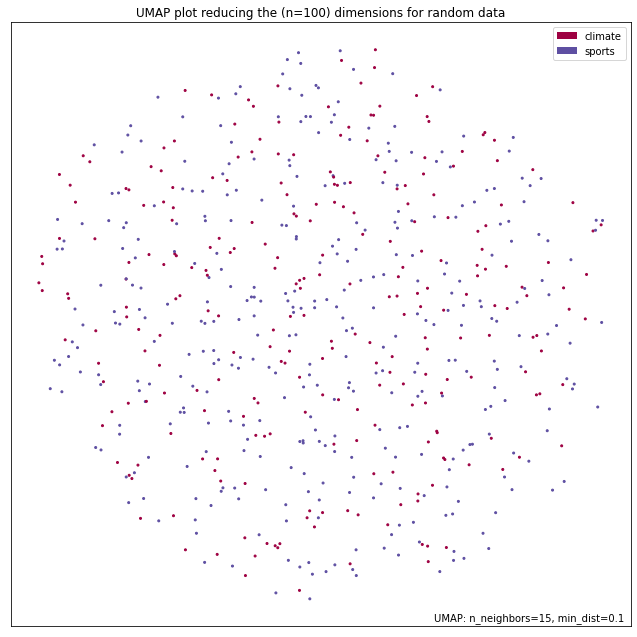

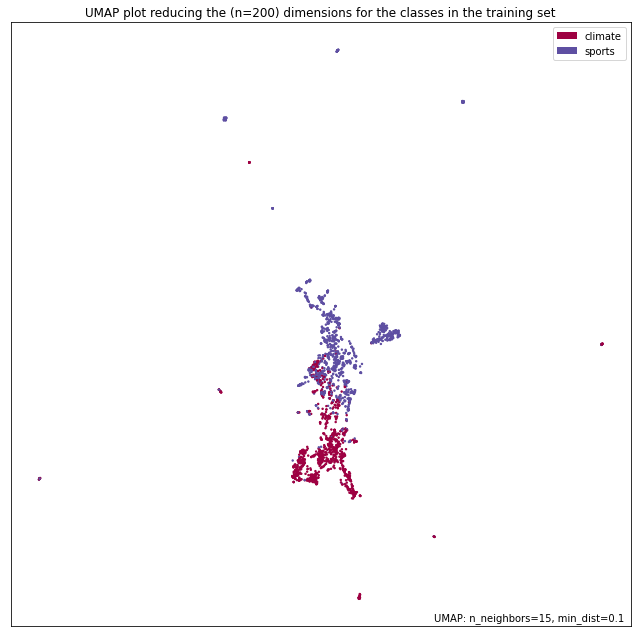

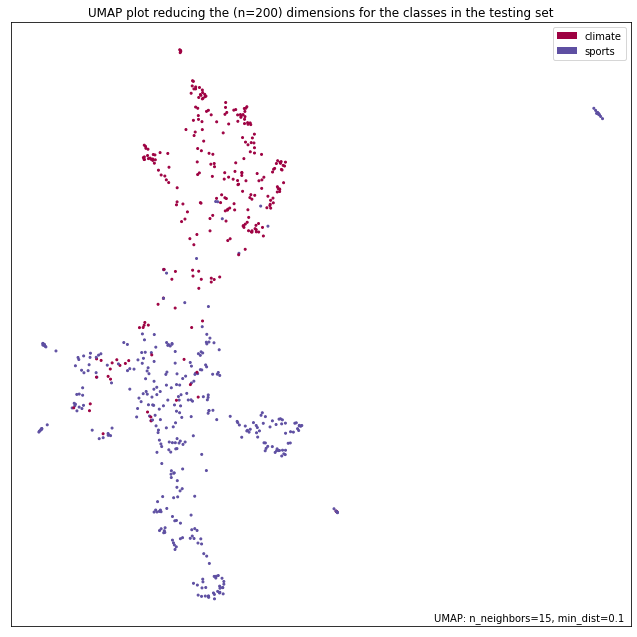

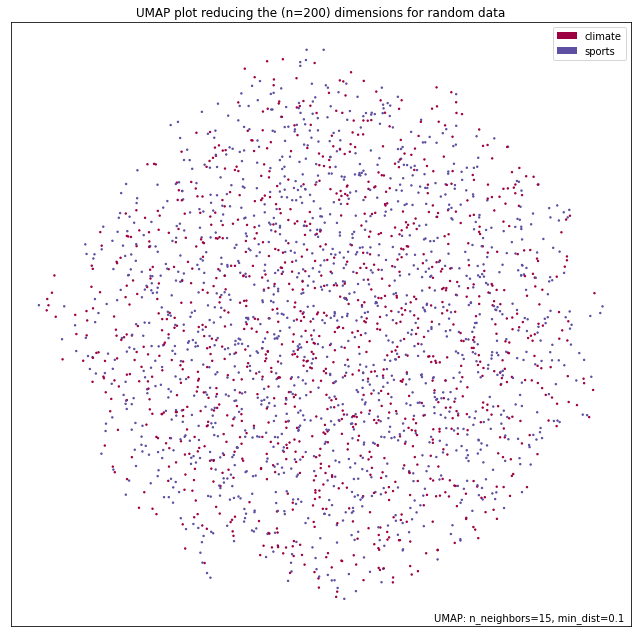

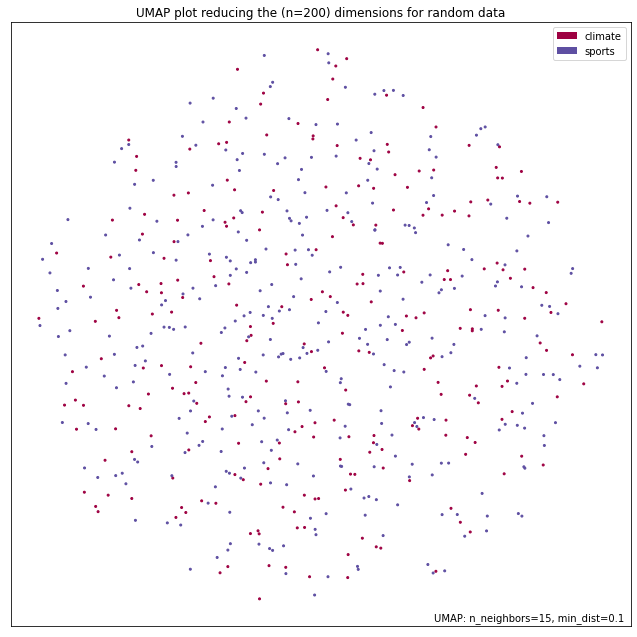

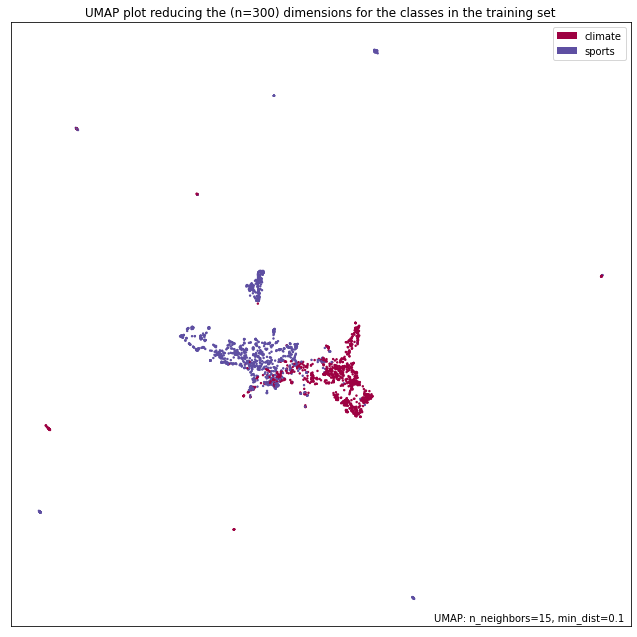

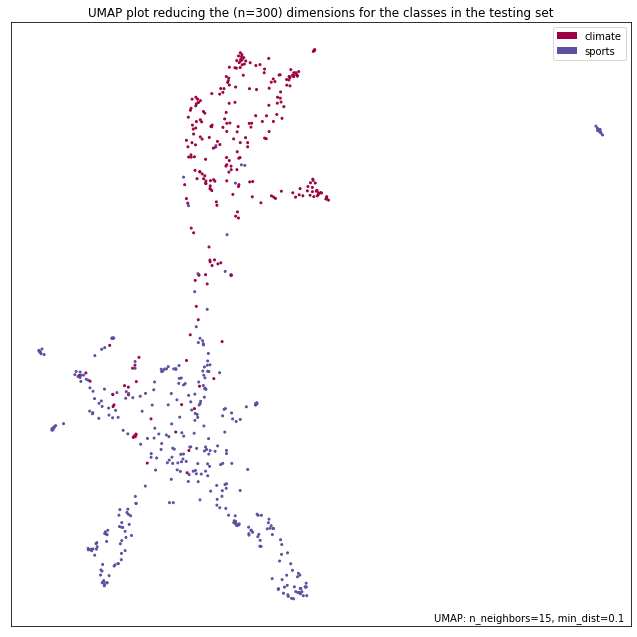

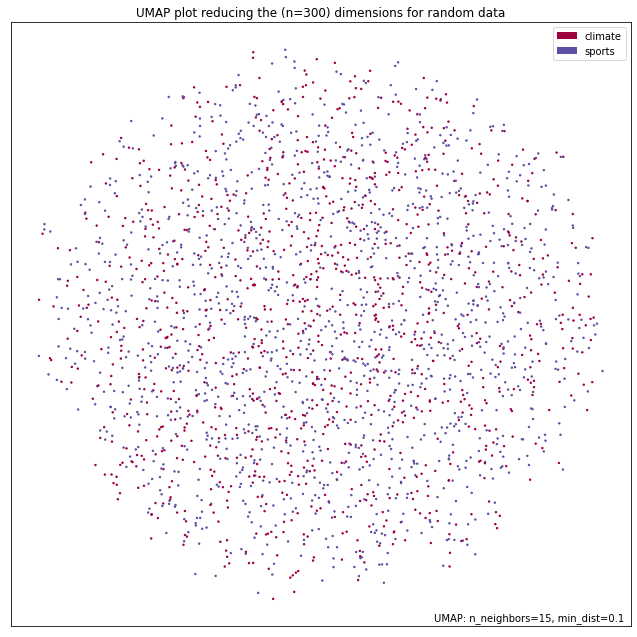

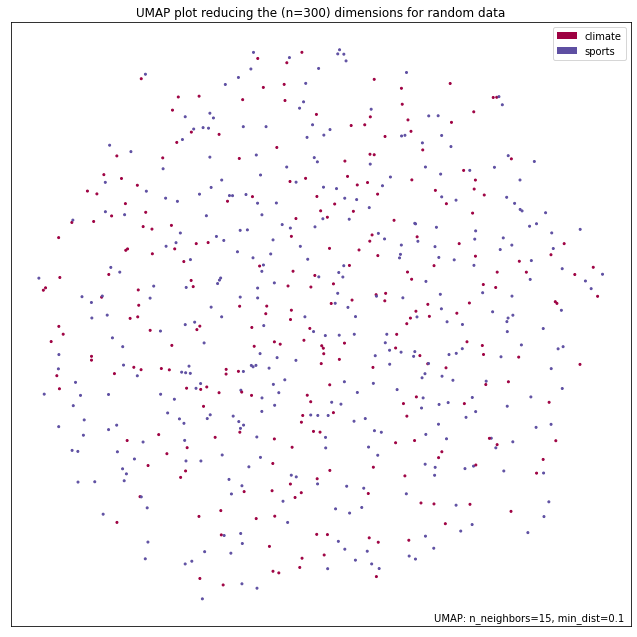

In [ ]:
train_umaps = []
test_umaps = []
random_train = []
random_test = []
for j, i in enumerate(vector_lengths):
  train_umaps.append(umap.UMAP(n_components=2, metric='euclidean').fit(train_data_vectorized[j]))
  graph = umap.plot.points(train_umaps[j], labels=np.array(train["root_label"]))
  plt.title('UMAP plot reducing the (n=' + str(i) + ') dimensions for the classes in the training set')
  plt.show()
  test_umaps.append(umap.UMAP(n_components=2, metric='euclidean').fit(test_data_vectorized[j]))
  graph = umap.plot.points(test_umaps[j], labels=np.array(test["root_label"]))
  plt.title('UMAP plot reducing the (n=' + str(i) + ') dimensions for the classes in the testing set')
  plt.show()
  random_vector = np.random.normal(0, 1, train_data_vectorized[j].shape)
  random_train.append(umap.UMAP(n_components=2, metric='euclidean').fit(random_vector))
  graph = umap.plot.points(random_train[j], labels=np.array(train["root_label"]))
  plt.title('UMAP plot reducing the (n=' + str(i) + ') dimensions for random data')
  plt.show()
  random_vector = np.random.normal(0, 1, test_data_vectorized[j].shape)
  random_test.append(umap.UMAP(n_components=2, metric='euclidean').fit(random_vector))
  graph = umap.plot.points(random_test[j], labels=np.array(test["root_label"]))
  plt.title('UMAP plot reducing the (n=' + str(i) + ') dimensions for random data')
  plt.show() 